In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [36]:
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [37]:
#EDA
## Look at the fuel_efficiency_mpg variable. Does it have a long tail?

In [38]:
import seaborn as sns

%matplotlib inline

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

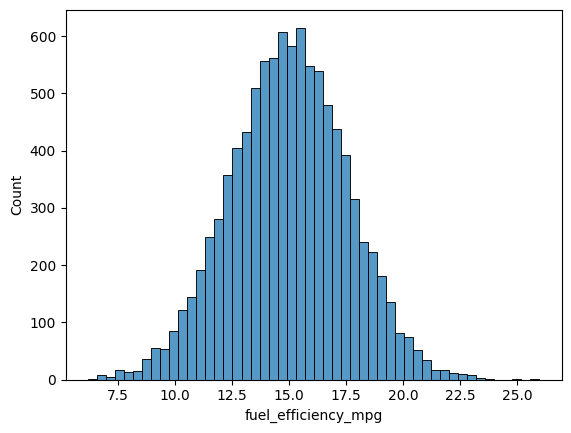

In [39]:
sns.histplot(df.fuel_efficiency_mpg, bins=50)

In [40]:
#Use only the following columns:'engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg'

In [41]:
cols_to_use = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']
car_fuel = df[cols_to_use]

In [42]:
car_fuel.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [43]:
#Q1 There's one column with missing values. What is it?
car_fuel.isna().any()

engine_displacement    False
horsepower              True
vehicle_weight         False
model_year             False
fuel_efficiency_mpg    False
dtype: bool

In [44]:
#Q2 Median for horse power
car_fuel['horsepower'].median()

np.float64(149.0)

In [45]:
#Prepare and split the dataset
##Shuffle the dataset (the filtered one you created above), use seed 42.
##Split your data in train/val/test sets, with 60%/20%/20% distribution.
##Use the same code as in the lectures

In [46]:
n = len(car_fuel)
n

9704

In [47]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [48]:
n_val, n_test, n_train

(1940, 1940, 5824)

In [49]:
idx = np.arange(n)

In [50]:
np.random.seed(42)
np.random.shuffle(idx)

In [51]:
df_train = car_fuel.iloc[idx[:n_train]].copy()
df_val = car_fuel.iloc[idx[n_train:n_train+n_val]].copy()
df_test = car_fuel.iloc[idx[n_train+n_val:]].copy()

In [52]:
df_train.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209


In [53]:
len(df_train), len(df_val), len(df_test)

(5824, 1940, 1940)

In [54]:
df_train.isnull().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [55]:
#Q3 Filling NAs
#We need to deal with missing values for the column from Q1.
#We have two options: fill it with 0 or with the mean of this variable.
#Try both options. For each, train a linear regression model without regularization using the code from the lessons.
#For computing the mean, use the training only!
#Use the validation dataset to evaluate the models and compare the RMSE of each option.
#Round the RMSE scores to 2 decimal digits using round(score, 2)
#Which option gives better RMSE?

In [56]:
target = "fuel_efficiency_mpg"
features = car_fuel.columns[car_fuel.columns != target].tolist()

In [57]:
def linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [58]:
def rmse(y_true, y_pred):
    error = y_true - y_pred
    mse = (error**2).mean()
    return np.sqrt(mse)

In [64]:
## With 0
X_train_zero = df_train[features].fillna(0).to_numpy()
y_train = df_train[target].to_numpy()

X_val_zero = df_val[features].fillna(0).to_numpy()
y_val = df_val[target].to_numpy()

In [65]:
## train model
w0_zero, w_zero = linear_regression(X_train_zero, y_train)

In [66]:
## get predictions on the validation set
y_pred_zero = w0_zero + X_val_zero.dot(w_zero)

In [68]:
#rmse zero
round(rmse(y_val, y_pred_zero),2)

np.float64(0.52)

<Axes: ylabel='Count'>

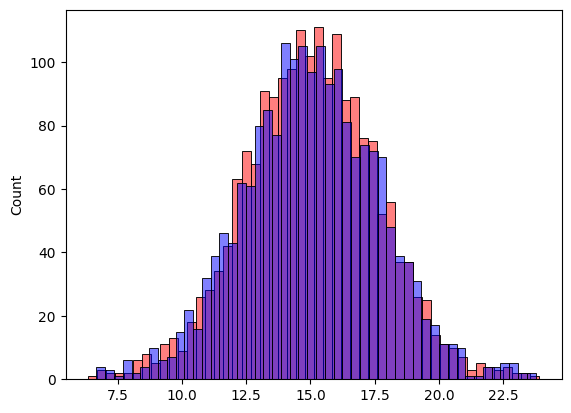

In [71]:
sns.histplot(y_pred_zero, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue', alpha=0.5, bins=50)


In [72]:
## With Mean
horsepower_mean = df_train.horsepower.mean()

In [73]:
## fill missing values with mean
X_train_mean = df_train[features].fillna(horsepower_mean).to_numpy()
X_val_mean = df_val[features].fillna(horsepower_mean).to_numpy()

In [75]:
## train the model
w0_mean, w_mean = linear_regression(X_train_mean, y_train)

In [76]:
## predictions
y_pred_mean = w0_mean + X_val_mean.dot(w_mean)

In [77]:
#rmse mean
round(rmse(y_val, y_pred_mean),2)

np.float64(0.46)

<Axes: ylabel='Count'>

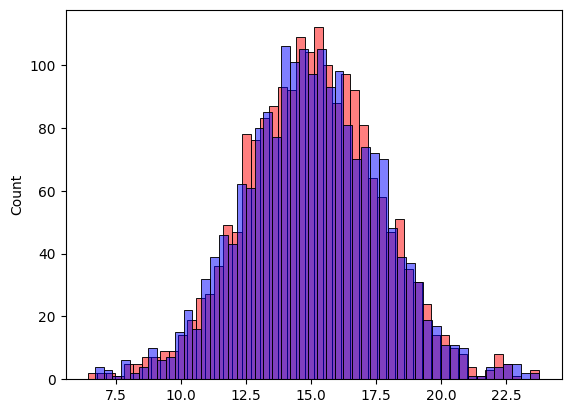

In [78]:
sns.histplot(y_pred_mean, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue', alpha=0.5, bins=50)


In [79]:
#Q4 Best regularization
# Now let's train a regularized linear regression.
# For this question, fill the NAs with 0.
# Try different values of r from this list: [0, 0.01, 0.1, 1, 5, 10, 100].
# Use RMSE to evaluate the model on the validation dataset.
# Round the RMSE scores to 2 decimal digits.

In [82]:
def linear_regression_reg(X, y, r=0.0):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)

    reg = r * np.eye(XTX.shape[0])

    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [84]:
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

for r in r_values:
    # Train the regularized model
    w0, w = linear_regression_reg(X_train_zero, y_train, r=r)

    # Make predictions on the validation set
    y_pred = w0 + X_val_zero.dot(w)

    # Calculate and round the RMSE
    score = round(rmse(y_val, y_pred), 2)

    # Store the result
    rmse_scores[r] = score

    print(f"r = {r:<4} | RMSE = {score}")

r = 0    | RMSE = 0.52
r = 0.01 | RMSE = 0.52
r = 0.1  | RMSE = 0.52
r = 1    | RMSE = 0.52
r = 5    | RMSE = 0.52
r = 10   | RMSE = 0.52
r = 100  | RMSE = 0.52


In [85]:
best_r = min(rmse_scores, key=rmse_scores.get)
best_rmse = rmse_scores[best_r]
best_rmse

np.float64(0.52)

In [ ]:
#Q5 RMSE Standard Deviation
# We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
# Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
# For each seed, do the train/validation/test split with 60%/20%/20% distribution.
# Fill the missing values with 0 and train a model without regularization.
# For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
# What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
# Round the result to 3 decimal digits (round(std, 3))

In [86]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

In [89]:
for seed in seeds:
    # Set the seed for this iteration's data split
    np.random.seed(seed)

    # Shuffle the dataset indices
    n = len(car_fuel)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.shuffle(idx)

    # Create the data splits
    df_train = car_fuel.iloc[idx[:n_train]].copy()
    df_val = car_fuel.iloc[idx[n_train : n_train + n_val]].copy()
    df_test = car_fuel.iloc[idx[n_train + n_val :]].copy()

    # Prepare data (fill missing values with 0)
    X_train = df_train[features].fillna(0).to_numpy()
    y_train = df_train[target].to_numpy()

    X_val = df_val[features].fillna(0).to_numpy()
    y_val = df_val[target].to_numpy()

    # Train the model (without regularization)
    w0, w = linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)

    # Calculate and store the score
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

    print(f"Seed: {seed} -> RMSE: {round(score, 3)}")

Seed: 0 -> RMSE: 0.521
Seed: 1 -> RMSE: 0.521
Seed: 2 -> RMSE: 0.523
Seed: 3 -> RMSE: 0.516
Seed: 4 -> RMSE: 0.511
Seed: 5 -> RMSE: 0.528
Seed: 6 -> RMSE: 0.531
Seed: 7 -> RMSE: 0.509
Seed: 8 -> RMSE: 0.515
Seed: 9 -> RMSE: 0.513


In [90]:
round(np.std(rmse_scores), 5)

np.float64(0.00699)

In [91]:
#Q6 Evaluation on test
# Split the dataset like previously, use seed 9.
# Combine train and validation datasets.
# Fill the missing values with 0 and train a model with r=0.001.
# What's the RMSE on the test dataset?

In [ ]:
# Set the seed
np.random.seed(seed)

# Split the data with 60%/20%/20% distribution
n = len(car_fuel)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

idx = np.arange(n)
np.random.shuffle(idx)

# Create the data splits
df_train = car_fuel.iloc[idx[:n_train]].copy()
df_val = car_fuel.iloc[idx[n_train : n_train + n_val]].copy()
df_test = car_fuel.iloc[idx[n_train + n_val :]].copy()

# Combine train and validation datasets
df_train_val = pd.concat([df_train, df_val]).reset_index(drop=True)